In [418]:
#will start using uproot

In [1]:
#Begin with preselection cuts: trigger and has good PV

In [60]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [61]:
pre_branches = [("pass_HLT_j30_muvtx_noiso"), ("hasGoodPV")]

In [62]:
sig_file = uproot.open("user.calpert.mc16_13TeV.311423.MGPy8EG_A14NNPDF23_NNPDF31ME_HSS_LLP_mH600_mS150_lthigh.032123_trees.root/user.calpert.311423.e7357_e5984_s3234_r10201_r10210_p4696.32829947._000001.trees.root:trees_DV_")

In [52]:
#Start by looking at histograms of trigger and goodPV of signal

Text(0.5, 1.0, 'Histogram of Trigger and Good PV (Signal)')

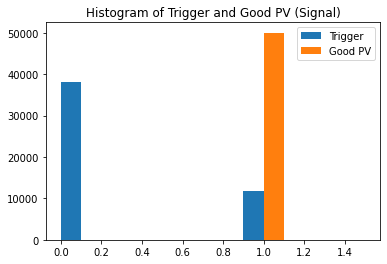

In [53]:
plt.hist(sig_file["pass_HLT_j30_muvtx_noiso"].array(), label = "Trigger")
plt.hist(sig_file["hasGoodPV"].array(), label = "Good PV")
plt.legend()
plt.title("Histogram of Trigger and Good PV (Signal)")

In [54]:
#All candidates have good PV, so we'd expect a preselection to contain all events that pass trigger, roughly 10,000 or so

In [63]:
pre_batch=sig_file.arrays(pre_branches)

In [91]:
pre_cut = (pre_batch.pass_HLT_j30_muvtx_noiso ==1) & (pre_batch.hasGoodPV ==1)

In [303]:
pre_cut #Tells us which entries satisfy both conditions - an array of booleans

<Array [False, False, True, ... True, False] type='50000 * bool'>

In [93]:
presel = pre_batch[pre_cut] #Applies the cut to the both branches

In [94]:
presel #As you can see we have about 20% of number of original events

<Array [{pass_HLT_j30_muvtx_noiso: 1, ... ] type='11859 * {"pass_HLT_j30_muvtx_n...'>

In [420]:
#Let's see what these arrays look like
for event in presel[0:9]:
    print(presel)

[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]
[{pass_HLT_j30_muvtx_noiso: 1, hasGoodPV: 1}, ... hasGoodPV: 1}]


In [421]:
#Let's try using awkward array for cuts instead of uproot since uproot outputs into a non-numpy dict type array

In [49]:
#First , lets take a look at MDT/RPC/TGC hits

In [103]:
#Flatten arrays
MDT_flat =ak.flatten(sig_file["MSVtx_nMDT"].array())
RPC_flat = ak.flatten(sig_file["MSVtx_nRPC"].array())
TGC_flat = ak.flatten(sig_file["MSVtx_nTGC"].array())

<Figure size 432x288 with 0 Axes>

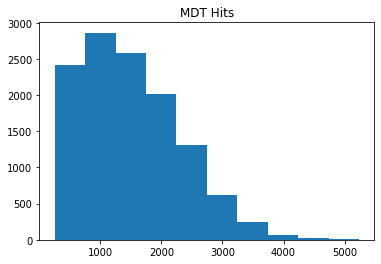

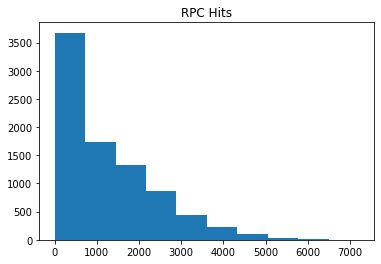

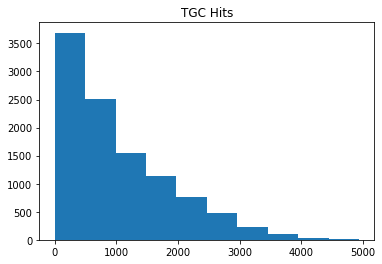

<Figure size 432x288 with 0 Axes>

In [104]:
#Plot a histogram of hits from all three sources. Include only nonnegative values
plt.hist(MDT_flat[MDT_flat>0], label = "MDT hits")
plt.title("MDT Hits")
plt.figure()
plt.hist(RPC_flat[RPC_flat>0], label = "RPC hits")
plt.title("RPC Hits")
plt.figure()
plt.hist(TGC_flat[TGC_flat>0], label = "TGC hits")
plt.title("TGC Hits")
plt.figure()

In [105]:
#We want MDT in range of 300 - 3000
#We want RPC > 250 and eta < 1.0
#We want TGC > 250 and eta between 1.0 and 2.5

In [422]:
#Using awkward array to perform cuts on trigger and mdt/rpc/tgc hits

In [423]:
trig = sig_file["pass_HLT_j30_muvtx_noiso"].array()#(entry_stop = 10)

In [424]:
goodPV = sig_file["hasGoodPV"].array()#(entry_stop = 10)

In [425]:
mdt = sig_file["MSVtx_nMDT"].array()#(entry_stop = 10)

In [426]:
rpc = sig_file["MSVtx_nRPC"].array()#(entry_stop = 10)

In [427]:
tgc = sig_file["MSVtx_nTGC"].array()#(entry_stop = 10)

In [428]:
eta = sig_file["MSVtx_eta"].array()#(entry_stop = 10)

In [429]:
jet = sig_file["jet_pT"].array()#(entry_stop = 10)

In [439]:
cut = (trig == True)\
& (goodPV == True)\
& ((mdt > 300) & (mdt < 3000))\
& ((rpc > 250) & abs(eta < 1.0))\
& ((tgc > 250) & (abs(eta > 1.0) & abs(eta < 2.5)))

In [440]:
ak.any(cut)

False

In [441]:
#It appears no candidates pass this criteria....time to back up and rethink strategy